In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import statsmodels.api as sm

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.api import VAR

In [10]:
# pull in data
final_df=pd.read_csv('final_df.csv',index_col='Date')
final_df

,su_rev,unemp,cpi,t1,t2
Date,,,,,
2006-01-01,12178334.0,15997.0,115.200,1.402944e+09,87700.448634
2006-02-01,8735598.0,15467.0,115.400,1.008088e+09,65176.699373
2006-03-01,8475104.0,15301.0,116.000,9.831121e+08,64251.491014
2006-04-01,10678617.0,13971.0,116.900,1.248330e+09,89351.537277
2006-05-01,9455838.0,13690.0,117.500,1.111061e+09,81158.580351
...,...,...,...,...,...
2019-08-01,16064102.0,11321.0,144.388,2.319464e+09,204881.508663
2019-09-01,15769154.0,10188.0,144.428,2.277507e+09,223548.034346
2019-10-01,16835541.0,10079.0,144.722,2.436473e+09,241737.589503


In [11]:
#train test split 
train, test = train_test_split(final_df,
                               test_size = 0.25,
                              shuffle = False)

In [12]:
model=VAR(train)
ts_model = model.fit(maxlags=10,  #used AIC to test the strength of our predictions
                    ic='aic' )

C:\Users\natha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
ts_model.k_ar #Finding the number of lags before information is not longer relevant  

10

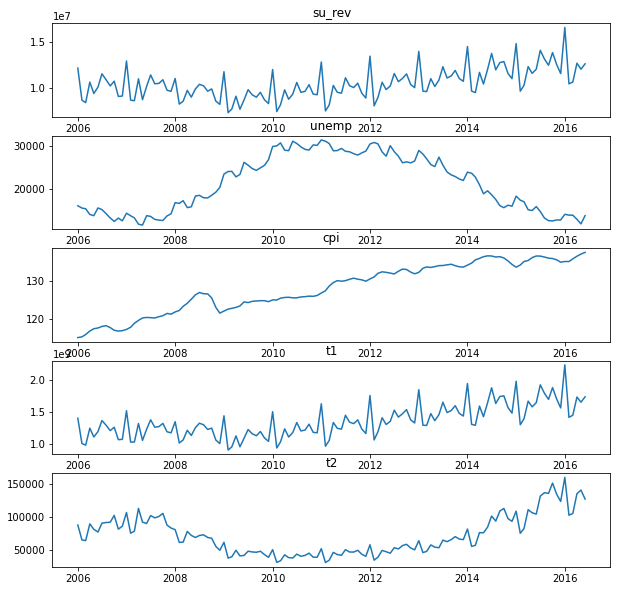

In [17]:
ts_model.plot();

In [14]:
ts_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Oct, 2020
Time:                     16:17:29
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    92.7450
Nobs:                     116.000    HQIC:                   89.1490
Log likelihood:          -5596.11    FPE:                6.15735e+37
AIC:                      86.6918    Det(Omega_mle):     9.95638e+36
--------------------------------------------------------------------
Results for equation su_rev
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const       -9972379.274291  46007219.930740           -0.217           0.828
L1.su_rev         -1.033533         1.409500           -0.733           0.463
L1.unemp        -366.172215       138.180651           -2.650          

In [15]:
ts_model.forecast(test.values,30) # looking at 30 periods ahead. 

array([[1.99359651e+07, 1.39273190e+04, 1.45129797e+02, 2.77839845e+09,
        2.65059102e+05],
       [1.36811125e+07, 1.35599625e+04, 1.47334037e+02, 1.93472402e+09,
        2.10029617e+05],
       [1.45511413e+07, 1.32965981e+04, 1.48794332e+02, 2.10588535e+09,
        2.08830499e+05],
       [1.82362239e+07, 1.10049472e+04, 1.50089158e+02, 2.59451934e+09,
        2.61682640e+05],
       [1.59126082e+07, 8.78106957e+03, 1.50333771e+02, 2.28542487e+09,
        2.63420701e+05],
       [1.71369928e+07, 1.15263063e+04, 1.50955531e+02, 2.45977221e+09,
        2.49861825e+05],
       [1.99821933e+07, 1.11817963e+04, 1.50548526e+02, 2.86142223e+09,
        3.01705951e+05],
       [1.92852845e+07, 9.83405644e+03, 1.50576672e+02, 2.72792205e+09,
        2.97349123e+05],
       [1.91769420e+07, 8.10243849e+03, 1.50452512e+02, 2.74146103e+09,
        3.13171019e+05],
       [2.15201564e+07, 8.80331910e+03, 1.51025565e+02, 3.05770283e+09,
        3.35609797e+05],
       [1.81153824e+07, 8.6531

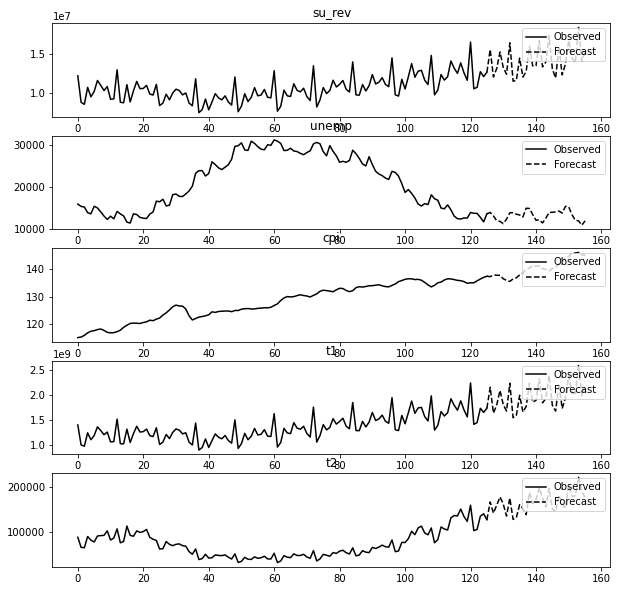

In [16]:
ts_model.plot_forecast(30,plot_stderr=False);